In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gc

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/amex-default-prediction/sample_submission.csv
/kaggle/input/amex-default-prediction/train_data.csv
/kaggle/input/amex-default-prediction/test_data.csv
/kaggle/input/amex-default-prediction/train_labels.csv
/kaggle/input/amexfeather/test_data_f32.ftr
/kaggle/input/amexfeather/train_data.ftr
/kaggle/input/amexfeather/train_data_f32.ftr
/kaggle/input/amexfeather/test_data.ftr


In [2]:
train_dataset_ = pd.read_feather('../input/amexfeather/train_data.ftr')
train_dataset = train_dataset_.groupby('customer_ID').tail(1).set_index('customer_ID', drop=True).sort_index()

In [3]:
del train_dataset_
gc.collect()

21

In [4]:
categorical_cols = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
num_cols = [col for col in train_dataset.columns if col not in categorical_cols + ["target"]]

# **feature engineering process**

***Remove features that has lots of missing values***

In [5]:
train_dataset = train_dataset.drop(['S_2','D_66','D_42','D_49','D_73','D_76','R_9','B_29','D_87','D_88','D_106','R_26','D_108','D_110','D_111','B_39','B_42','D_132','D_134','D_135','D_136','D_137','D_138','D_142'], axis=1)

In [6]:
selected_col = np.array(['P_2','S_3','B_2','D_41','D_43','B_3','D_44','D_45','D_46','D_48','D_50','D_53','S_7','D_56','S_9','B_6','B_8','D_52','P_3','D_54','D_55','B_13','D_59','D_61','B_15','D_62','B_16','B_17','D_77','B_19','B_20','D_69','B_22','D_70','D_72','D_74','R_7','B_25','B_26','D_78','D_79','D_80','B_27','D_81','R_12','D_82','D_105','S_27','D_83','R_14','D_84','D_86','R_20','B_33','D_89','D_91','S_22','S_23','S_24','S_25','S_26','D_102','D_103','D_104','D_107','B_37','R_27','D_109','D_112','B_40','D_113','D_115','D_118','D_119','D_121','D_122','D_123','D_124','D_125','D_128','D_129','B_41','D_130','D_131','D_133','D_139','D_140','D_141','D_143','D_144','D_145'])

for col in selected_col:
    train_dataset[col] = train_dataset[col].fillna(train_dataset[col].median())

In [7]:
selcted_col2 = np.array(['D_68','B_30','B_38','D_64','D_114','D_116','D_117','D_120','D_126'])

for col2 in selcted_col2:
    train_dataset[col2] =  train_dataset[col2].fillna(train_dataset[col2].mode()[0])

In [8]:
test_dataset_ = pd.read_feather('../input/amexfeather/test_data.ftr')
test_dataset = test_dataset_.groupby('customer_ID').tail(1).set_index('customer_ID', drop=True).sort_index()

In [9]:
del test_dataset_
gc.collect()

21

In [10]:
test_dataset = test_dataset.drop(['S_2','D_42','D_49','D_66','D_73','D_76','R_9','B_29','D_87','D_88','D_106','R_26','D_108','D_110','D_111','B_39','B_42','D_132','D_134','D_135','D_136','D_137','D_138','D_142'], axis=1)

***Imputation***

In [11]:
selected_column = np.array(['P_2','S_3','B_2','D_41','D_43','B_3','D_44','D_45','D_46','D_48','D_50','D_53','S_7','D_56','S_9','S_12','S_17','B_6','B_8','D_52','P_3','D_54','D_55','B_13','D_59','D_61','B_15','D_62','B_16','B_17','D_77','B_19','B_20','D_69','B_22','D_70','D_72','D_74','R_7','B_25','B_26','D_78','D_79','D_80','B_27','D_81','R_12','D_82','D_105','S_27','D_83','R_14','D_84','D_86','R_20','B_33','D_89','D_91','S_22','S_23','S_24','S_25','S_26','D_102','D_103','D_104','D_107','B_37','R_27','D_109','D_112','B_40','D_113','D_115','D_118','D_119','D_121','D_122','D_123','D_124','D_125','D_128','D_129','B_41','D_130','D_131','D_133','D_139','D_140','D_141','D_143','D_144','D_145'])

for column in selected_column:
    test_dataset[column] = test_dataset[column].fillna(test_dataset[column].median())

In [12]:
selected_column2 = np.array(['D_68','B_30','B_38','D_114','D_116','D_117','D_120','D_126'])

for column2 in selected_column2:
    test_dataset[column2] =  test_dataset[column2].fillna(test_dataset[column2].mode()[0])

In [13]:
categorical_cols.remove('D_66')

***Remove highly corelated features***

In [14]:
train_dataset_without_target = train_dataset.drop(["target"],axis=1)

cor_matrix = train_dataset_without_target.corr()
col_core = set()

for i in range(len(cor_matrix.columns)):
    for j in range(i):
        if(cor_matrix.iloc[i, j] > 0.9):
            col_name = cor_matrix.columns[i]
            col_core.add(col_name)
col_core

{'B_11',
 'B_13',
 'B_15',
 'B_23',
 'B_33',
 'B_37',
 'D_104',
 'D_119',
 'D_141',
 'D_143',
 'D_74',
 'D_75',
 'D_77',
 'S_24',
 'S_7'}

In [15]:
train_dataset = train_dataset.drop(col_core, axis=1)
test_dataset = test_dataset.drop(col_core, axis=1)

In [16]:
y = train_dataset.pop('target')


In [17]:
print(f"X shape is = {train_dataset.shape}" )
print(f"Y shape is = {y.shape}" )

X shape is = (458913, 150)
Y shape is = (458913,)


In [18]:
categorical_cols=["D_63","D_64","D_68","B_30","B_38","D_114","D_116","D_117","D_120","D_126"]
for col in categorical_cols:
    train_dataset[col] =train_dataset[col].astype(str)
    test_dataset[col] =test_dataset[col].astype(str)

In [19]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from catboost import Pool, cv

# **Methodology**

***splitting 70-30 of training-testing samples***

In [20]:
X_train, X_test, y_train, y_test = train_test_split( train_dataset, y, test_size=0.3, random_state=68)

In [21]:
train_dataset_pool = Pool(data=X_train,
                     label=y_train,
                     cat_features = categorical_cols)

In [22]:
final_model = CatBoostClassifier(verbose=100,  cat_features=categorical_cols)

In [23]:
final_model.fit(X_train, y_train)

Learning rate set to 0.121157
0:	learn: 0.5587618	total: 728ms	remaining: 12m 7s
100:	learn: 0.2259755	total: 51.3s	remaining: 7m 36s
200:	learn: 0.2178817	total: 1m 41s	remaining: 6m 41s
300:	learn: 0.2122613	total: 2m 30s	remaining: 5m 50s
400:	learn: 0.2076218	total: 3m 20s	remaining: 4m 59s
500:	learn: 0.2030819	total: 4m 10s	remaining: 4m 9s
600:	learn: 0.1987579	total: 5m	remaining: 3m 19s
700:	learn: 0.1944985	total: 5m 49s	remaining: 2m 29s
800:	learn: 0.1907509	total: 6m 39s	remaining: 1m 39s
900:	learn: 0.1868905	total: 7m 28s	remaining: 49.3s
999:	learn: 0.1831784	total: 8m 17s	remaining: 0us


In [24]:
p = final_model.predict_proba(X_test)

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score


In [26]:

p = p[:,1].reshape(-1,1)

In [27]:
roc_auc_score(y_test, p)

0.9584836516551164

In [28]:
#Amex metric as provided in competition
def amex_metric(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:

    def top_four_percent_captured(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        four_pct_cutoff = int(0.04 * df['weight'].sum())
        df['weight_cumsum'] = df['weight'].cumsum()
        df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()
        
    def weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
        total_pos = (df['target'] * df['weight']).sum()
        df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
        df['lorentz'] = df['cum_pos_found'] / total_pos
        df['gini'] = (df['lorentz'] - df['random']) * df['weight']
        return df['gini'].sum()

    def normalized_weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        y_true_pred = y_true.rename(columns={'target': 'prediction'})
        return weighted_gini(y_true, y_pred) / weighted_gini(y_true, y_true_pred)

    g = normalized_weighted_gini(y_true, y_pred)
    d = top_four_percent_captured(y_true, y_pred)

    return 0.5 * (g + d)

In [29]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )


In [30]:
y_test1 = pd.DataFrame(y_test, columns=['target'])
y_pred1 = pd.DataFrame(p, columns=['prediction'])

In [31]:
amex_metric(y_test1,y_pred1)

-0.03327062932588106

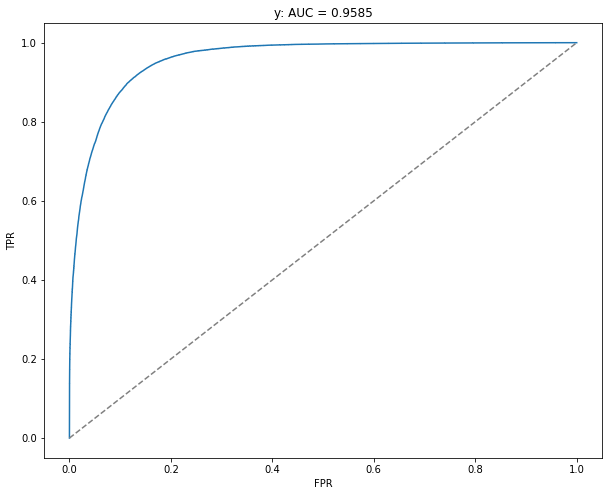

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_roc(
    y_test, 
    p, 
    'y',
    ax=ax
)

In [33]:
train_dataset_final = Pool(data=train_dataset,
                     label=y,
                     cat_features = categorical_cols)

In [34]:
final_model.fit(train_dataset, y)

Learning rate set to 0.141089
0:	learn: 0.5450742	total: 1.18s	remaining: 19m 43s
100:	learn: 0.2255907	total: 1m 18s	remaining: 11m 34s
200:	learn: 0.2185165	total: 2m 29s	remaining: 9m 56s
300:	learn: 0.2137864	total: 3m 40s	remaining: 8m 32s
400:	learn: 0.2096374	total: 4m 53s	remaining: 7m 18s
500:	learn: 0.2058599	total: 6m 3s	remaining: 6m 2s
600:	learn: 0.2022970	total: 7m 13s	remaining: 4m 47s
700:	learn: 0.1989025	total: 8m 24s	remaining: 3m 35s
800:	learn: 0.1955753	total: 9m 36s	remaining: 2m 23s
900:	learn: 0.1922438	total: 10m 48s	remaining: 1m 11s
999:	learn: 0.1889712	total: 11m 58s	remaining: 0us


In [35]:
predictions = final_model.predict_proba(test_dataset)
predictions = predictions[:,1].reshape(-1,1)

In [36]:
predictions[:,0]

array([0.02321478, 0.00141484, 0.03684264, ..., 0.47722894, 0.24877477,
       0.06591422])

In [37]:
sample_dataset = pd.read_csv('/kaggle/input/amex-default-prediction/sample_submission.csv')
output = pd.DataFrame({'customer_ID': sample_dataset.customer_ID, 'prediction': predictions[:,0]})
output.to_csv('submission.csv', index=False)